# MSA 2023 Phase 2 - Part 2

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

## 1. Load and split preprocessed data

In [2]:
#Loading in the raw preprocessed data and will use a 70:30 split as instructed
#Will use 'Math Score' as the target variable. ie the y = 'MathScore' and x is all other variables
full_dataset = "changed_exam_scores.csv"
TARGET = "MathScore"
full_dataframe = pd.read_csv(full_dataset)
y_dataframe = full_dataframe[TARGET].copy()
x_dataframe = full_dataframe.copy()
x_dataframe.drop(TARGET,axis=1,inplace=True)
x_train, x_test, y_train, y_test = train_test_split(np.array(x_dataframe),np.array(y_dataframe), test_size = 0.30, random_state=101)
cv_x_train, cv_x_test,cv_y_train, cv_y_test = train_test_split(x_train,y_train, test_size = 0.30, random_state=101)

## 2. Model selection and Training

In [3]:
#Given that the dataset has more than 10,000 samples, a linear regressor is more likely to be suitable than a logistic regressor.
#It is fast and accurcate, meaning it is an effective algorithm to start with.
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()
lr_model.fit(cv_x_train,cv_y_train)
predictions = lr_model.predict(cv_x_test)
rmse = mean_squared_error(cv_y_test,predictions ,squared=False)
print("Initial RMSE: ", rmse)
#print(type(dt_model).__name__)

Initial RMSE:  8.69948611582066


In [4]:
#I have chosen the decision tree regressor as a comparative algorithm. It is a simple algorithm so it will unlikely outperform the other algorihtms.
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)
predictions = dt_model.predict(cv_x_test)
rmse = mean_squared_error(cv_y_test,predictions ,squared=False)
print("Initial RMSE: ", rmse)
#print(type(dt_model).__name__)

Initial RMSE:  0.8926131189331208


## 2b Model conclusion

Please refer to report

## 3. Tuning and improvements

In [5]:
#The Lasso Regression model is likely to be a stronger performer. I will try to cross validate and/or tune this model to increase performance.
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(cv_x_train,cv_y_train)
predictions = lasso.predict(cv_x_test)
rmse = mean_squared_error(cv_y_test,predictions ,squared=False)
print("Initial RMSE: ", rmse)
#print(type(dt_model).__name__)

Initial RMSE:  8.697085673980478


In [6]:
#The RandomForestregression model is an essemble method of the decision-tree model. Therefore, it performs better. However, it can also be pruned for even better performance.
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(cv_x_train,cv_y_train)
predictions = rf_model.predict(cv_x_test)
rmse = mean_squared_error(cv_y_test,predictions ,squared=False)
print("Initial RMSE: ", rmse)
#print(type(dt_model).__name__)

Initial RMSE:  9.19821778196627


In [7]:
#Pruning Decision Tree
# I would have liked to tune more parameters but my machine has computational limitations
from sklearn.model_selection import GridSearchCV
dt_parameters= {'ccp_alpha':[0.01, 0.05, 0.1, 0.25,],'min_samples_leaf':[1,2]}
gridsearch_dt = GridSearchCV(estimator= dt_model, param_grid=dt_parameters)
gridsearch_dt.fit(x_train,y_train)
print()
print(gridsearch_dt.best_params_)



{'ccp_alpha': 0.05, 'min_samples_leaf': 1}


In [8]:
#Pruning random forest, 
#the key parameters are 'ccp_apha': the cost-complexity for pruning and the number of estimators. Controlling this will how overfit or underfit this model will become.
#I would have liked to tune more paramters but my machine has computational limitations
#The output from this was {'ccp_alpha': 0.1, 'n_estimators': 200}, it will likely take over an hour to run
from sklearn.model_selection import GridSearchCV
rf_parameters = {'ccp_alpha':[0.1,0.25,0.33,0.5], 'n_estimators': [10,50,100,200]}
gridsearch_rf = GridSearchCV(estimator= rf_model, param_grid=rf_parameters)
gridsearch_rf.fit(x_train,y_train)
print()
print(gridsearch_rf.best_params_)


KeyboardInterrupt: 

In [9]:
#Lasso Regression Cross Validation to find optimal alpha value
from sklearn.linear_model import LassoCV
cv_lasso= LassoCV(cv=10).fit(x_train,y_train)
a_value = cv_lasso.alpha_
print(a_value)

0.19216661172373417


## 4. Testing the model on Test data

In [10]:
#parameters taken from the optimisation above.
new_lr = LinearRegression() #The linear regrssion model does not have any tunable parameters
new_dt = DecisionTreeRegressor(ccp_alpha= 0.05, min_samples_leaf= 1) #value taken from GridSearchV results
new_lasso = Lasso(alpha= a_value)
new_rf = RandomForestRegressor(ccp_alpha= 0.1, n_estimators= 200) #value taken from GridSearchV results
models = [new_lr, new_dt, new_lasso, new_rf]

In [11]:
#Testing the models here, we will retrieve the Mean-square error, Root-mean-square error and the Mean Absolute Error.
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


predictions = []
rmse_list = []
mae_list = []
r2_list = []
for model in models:
    model.fit(x_train,y_train)
    prediction = model.predict(x_test)
    predictions.append(prediction)
    rmse = mean_squared_error(y_test,prediction,squared=False)
    rmse_list.append(rmse)
    mae = mean_absolute_error(y_test,prediction)
    mae_list.append(mae)
    r2 = r2_score(y_test, prediction)
    r2_list.append(r2)
    print(model, "DONE")

LinearRegression() DONE
DecisionTreeRegressor(ccp_alpha=0.05) DONE
Lasso(alpha=0.19216661172373417) DONE
RandomForestRegressor(ccp_alpha=0.1, n_estimators=200) DONE


## 5. Evaluate the model 

In [12]:
#Displaying the performance metrics, Look at the pdf for an explaination of each metric
print("RMSE","R2","MAE", "on test data")
for x in range(len(models)):
    print(models[x])
    print(rmse_list[x],r2_list[x],mae_list[x])

RMSE R2 MAE on test data
LinearRegression()
8.793954358513451 0.6715162523016156 7.216979611568991
DecisionTreeRegressor(ccp_alpha=0.05)
8.865870480318819 0.6661216662712768 7.2611636783324665
Lasso(alpha=0.19216661172373417)
8.793659317602582 0.6715382934708978 7.216638118489102
RandomForestRegressor(ccp_alpha=0.1, n_estimators=200)
8.824465476544974 0.6692329124891012 7.2279365806847755


C:\Users\kimby\AppData\Local\Temp\ipykernel_22108\2951460299.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)
C:\Users\kimby\AppData\Local\Temp\ipykernel_22108\2951460299.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residual)
C:\Users\kimby\AppData\Local\Temp\ipykernel_22108\

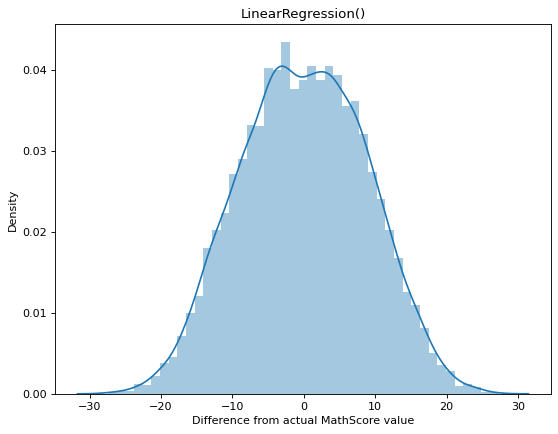

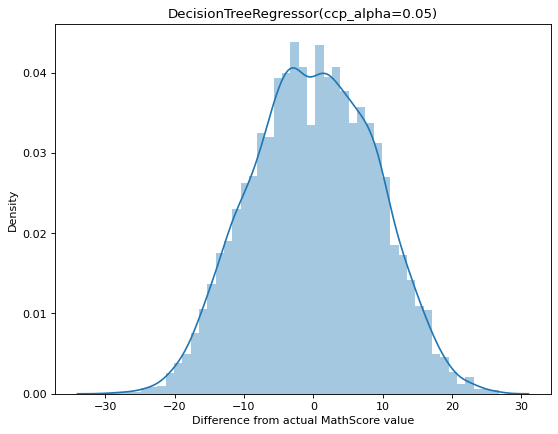

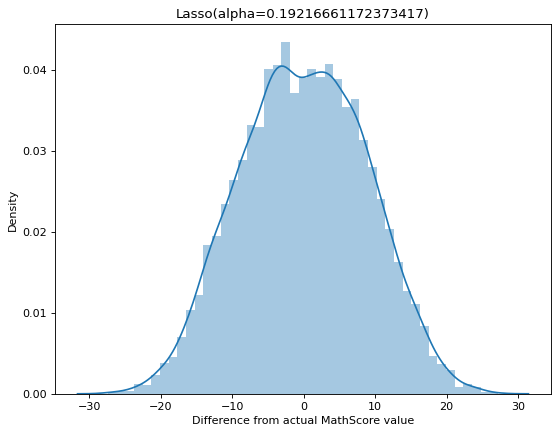

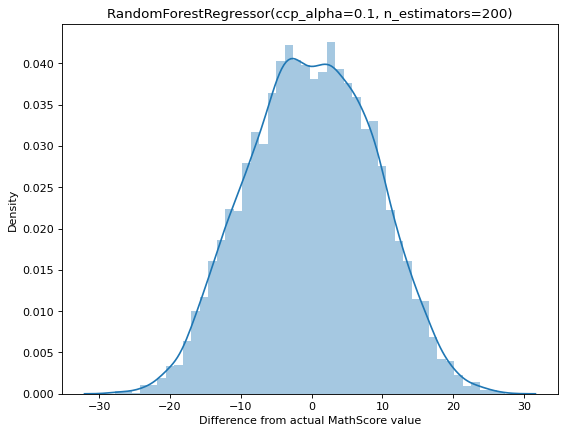

In [13]:
#Displaying the graphs, the graphs show the difference between each prediction to the resepctive actual target value.
#The order is LinearRegression, DecisionTreeRegression, LassoRegression, RandomforestRegression.
for x in range(len(models)):
    model = models[x]
    prediction = predictions[x]
    residual = y_test - prediction
    figure = plt.figure(figsize=(8, 6), dpi=80)
    sns.distplot(residual)
    plt.xlabel('Difference from actual MathScore value')
    plt.title(model)

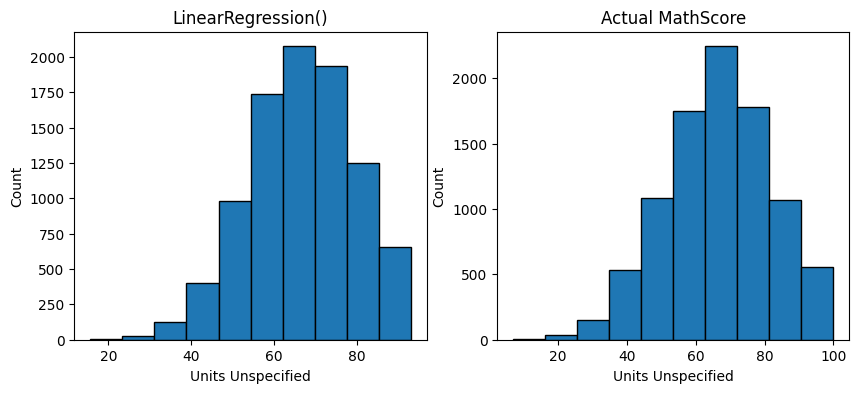

<Figure size 640x480 with 0 Axes>

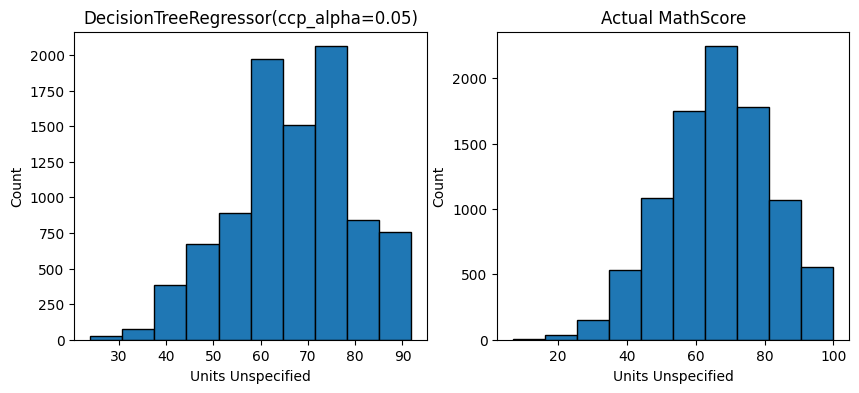

<Figure size 640x480 with 0 Axes>

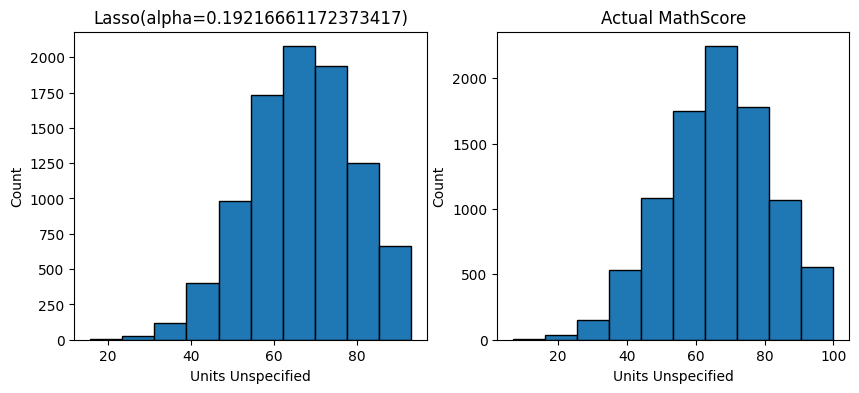

<Figure size 640x480 with 0 Axes>

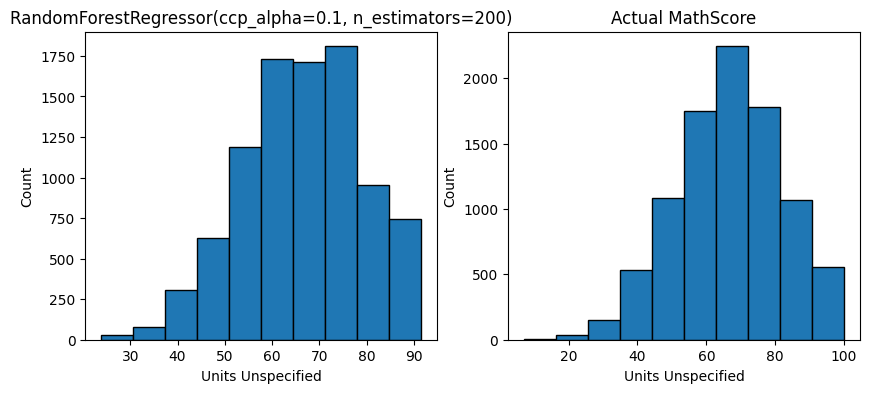

<Figure size 640x480 with 0 Axes>

In [14]:
#Side-by-side comaprison of the model predictions in respect to the actual MathScore values
for b in range(len(models)):
    fig = plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
    plt.hist(predictions[b], ec="k")
    plt.xlabel('Units Unspecified')
    plt.ylabel('Count')
    plt.title(str(models[b]))

    
    plt.subplot(1, 2, 2)
    plt.hist(y_test, ec="k")
    plt.xlabel('Units Unspecified')
    plt.ylabel('Count')
    plt.title("Actual MathScore")
    plt.show()
    plt.tight_layout()

In [19]:
#Side by side comparison of results from test datasets vs training datasets using RSME
for x in range(len(models)):
    model = models[x]
    training_prediction = model.predict(x_train)
    rmse_train = mean_squared_error(y_train,training_prediction,squared=False)
    print(model)
    print("Training RSME", rmse_train , "Test RSME", rmse_list[x] )
    print()

LinearRegression()
Training RSME 8.696455033574212 Test RSME 8.793954358513451

DecisionTreeRegressor(ccp_alpha=0.05)
Training RSME 8.70933010600299 Test RSME 8.865870480318819

Lasso(alpha=0.19216661172373417)
Training RSME 8.6965788662789 Test RSME 8.793659317602582

RandomForestRegressor(ccp_alpha=0.1, n_estimators=200)
Training RSME 8.67495919038598 Test RSME 8.824465476544974



In [22]:
#Saving my model as a json file
import pickle
pickle.dump(lr_model, open("lr_model.pkl", "wb"))